In [39]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "Healthcare-Diabetes.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Clean the Data

In [40]:
#Identify how many unique ids there are
id_unique = data_set_df["Id"].value_counts()
id_unique

#Count total number of participants
id_count = len(id_unique)
id_count

2768

In [41]:
data_set_df.shape


(2768, 10)

In [42]:
#List of all columns
data_set_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
#Reorganize Data Frame to move age next to ID number
data_set_2_df = data_set_df[["Id", "Age", 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]
data_set_2_df.head()

,Id,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,50,6,148,72,35,0,33.6,0.627,1
1,2,31,1,85,66,29,0,26.6,0.351,0
2,3,32,8,183,64,0,0,23.3,0.672,1
3,4,21,1,89,66,23,94,28.1,0.167,0
4,5,33,0,137,40,35,168,43.1,2.288,1


In [44]:
#Check for incomplete rows
data_set_2_df.count()

Id                          2768
Age                         2768
Pregnancies                 2768
Glucose                     2768
BloodPressure               2768
SkinThickness               2768
Insulin                     2768
BMI                         2768
DiabetesPedigreeFunction    2768
Outcome                     2768
dtype: int64

In [45]:
#Check Data Types
data_set_2_df.dtypes

Id                            int64
Age                           int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Outcome                       int64
dtype: object

In [46]:
#Display statistical data
data_set_2_df.describe()

,Id,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,33.132225,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,0.343931
std,799.197097,11.777230,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,0.475104
min,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,692.750000,24.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,1384.500000,29.000000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,0.000000
75%,2076.250000,40.000000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,1.000000
max,2768.000000,81.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,1.000000


In [47]:
#Reindex with ID number
data_set_final_df = data_set_2_df.set_index("Id")
data_set_final_df


,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Id,,,,,,,,,
1,50,6,148,72,35,0,33.6,0.627,1
2,31,1,85,66,29,0,26.6,0.351,0
3,32,8,183,64,0,0,23.3,0.672,1
4,21,1,89,66,23,94,28.1,0.167,0
5,33,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...,...
2764,33,2,75,64,24,55,29.7,0.370,0
2765,36,8,179,72,42,130,32.7,0.719,1
2766,42,6,85,78,0,0,31.2,0.382,0


In [48]:
# Check for missing values (zeros)
print("Missing values count before processing:")
(data_set_final_df == 0).sum()

Missing values count before processing:


Age                            0
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Outcome                     1816
dtype: int64

In [49]:

# Replace zeros in relevant columns with NaN
relevant_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_set_final_df[relevant_columns] = data_set_final_df[relevant_columns].replace(0, np.nan)

# Check for missing values (NaN after replacing zeros)
print("\nMissing values count after replacing zeros:")
print(data_set_final_df.isnull().sum())



Missing values count after replacing zeros:
Age                            0
Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Outcome                        0
dtype: int64


In [56]:
data_set_final_df.head(20)


,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Id,,,,,,,,,
1,50,6,148.0,72.0,35.0,NaN,33.6,0.627,1
2,31,1,85.0,66.0,29.0,NaN,26.6,0.351,0
3,32,8,183.0,64.0,NaN,NaN,23.3,0.672,1
4,21,1,89.0,66.0,23.0,94.0,28.1,0.167,0
5,33,0,137.0,40.0,35.0,168.0,43.1,2.288,1
6,30,5,116.0,74.0,NaN,NaN,25.6,0.201,0
7,26,3,78.0,50.0,32.0,88.0,31.0,0.248,1
8,29,10,115.0,NaN,NaN,NaN,35.3,0.134,0
9,53,2,197.0,70.0,45.0,543.0,30.5,0.158,1


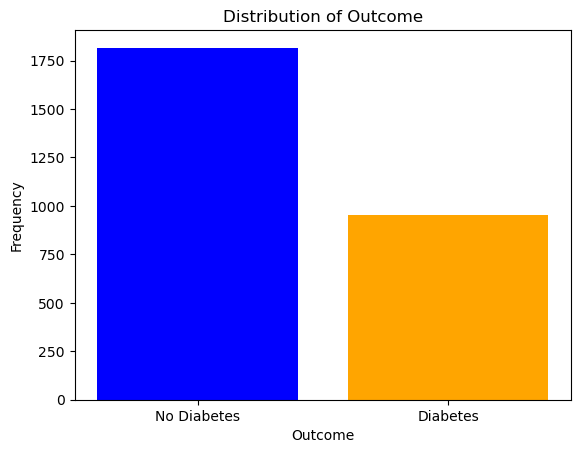

In [57]:
# Count the frequency of each outcome
outcome_counts = data_set_final_df['Outcome'].value_counts()

# Plot the bar graph
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.show()